# UAS BIOINFORMATIKA

<p> Berikut ini adalah anggota dari kelompok 1: </p>

<ul>
<li> Abdul Hafidh (2008107010056) </li>
<li> Yoan Rifqi Candra (2008107010020) </li>
<li> Haris Daffa (2008107010059) </li>
<li> Teuku Nabil Muhhamad Dhuha (2008107010004) </li>
<li> Khairul Umam Albi (2008107010072) </li>

</ul>

# 1 Informasi Genetik

In [2]:
from Bio.Seq import Seq
from Bio import SeqIO


In [3]:
for record in SeqIO.parse("coronavirus_nucleotide_sequences.fasta", "fasta"):
    print(record.id)
    print(repr(record.seq))
    print(len(record))

AB277133
Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB277120
Seq('GAACAATCTGGTTTTAAGCCTCAACCTGCAGGTGTTTTTACTCATCATGATGTT...TGT')
411
AB450865
Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB450878
Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB450881
Seq('GAACAATTTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB450855
Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB450830
Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB450845
Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB450849
Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB450887
Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB450889
Seq('GAACAATCTGTTTTTAAGCCTCAACCTGCAGGTGTTTTTACTGATCATGATGTT...TGT')
411
AB514461
Seq('ACTCAAATAAATTTTAAGTATGCTATTAGTGTTAAGAATAGAGCCCGCACTGTT...CGA')
251
AB277136
Seq('GAACAATCTGTTTT

In [4]:
# calculate sequence length cumulative
# Path: uas-bioinfor.ipynb
from Bio.Seq import Seq
from Bio import SeqIO

total_length = 0
for record in SeqIO.parse("coronavirus_nucleotide_sequences.fasta", "fasta"):
    total_length += len(record)
print(total_length)

52763761


In [5]:
# Membuat variabel untuk menyimpan data
base = []
count = []

result = {
    "base" : base,
    "count" : count
}

In [6]:
# Calculate ATGC in sequence
base.append("Adenine")
count.append(record.seq.count("A"))

base.append("Thymine")
count.append(record.seq.count("T"))

base.append("Guanine")
count.append(record.seq.count("G"))

base.append("Cytosine")
count.append(record.seq.count("C"))


In [7]:
# Menampilkan basa nukleotida ke dalam bentuk tabel 
import pandas as pd
df_result = pd.DataFrame(result)

df_result

,base,count
0,Adenine,441
1,Thymine,320
2,Guanine,307
3,Cytosine,343


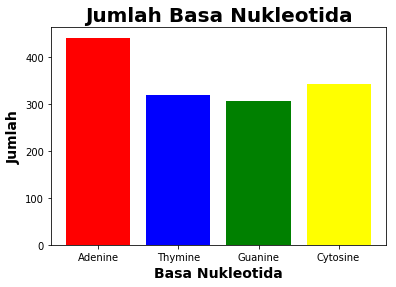

In [16]:
# Menampilkan basa nukleotida ke dalam bentuk bar chart
import numpy as np
import matplotlib.pylab as plt

labels = df_result["base"]
sizes = df_result["count"]
# Menampilkan warna pada bar chart sesuai dengan basa nukleotida
colors = ['red', 'blue', 'green', 'yellow']

plt.title("Jumlah Basa Nukleotida", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Basa Nukleotida", fontsize=14, color='black', fontweight='bold')
plt.ylabel("Jumlah", fontsize=14, color='black', fontweight='bold')
plt.bar(labels, sizes, color=colors)

plt.show()

# 2 Transkripsi

In [9]:
mRNA = record.seq.transcribe()
print(mRNA)

CAGUUUCCUGUUCACCUUUUACAAUUAAUUGCCAGGAACCUAAAUUGGGUAGUCUUGUAGUGCGUUGUUCGUUCUAUGAAGACUUUUUAGAGUAUCAUGACGUUCGUGUUGUUUUAGAUUUCAUCUAAACGAACAAACUAAAAUGUCUGAUAAUGGACCCCAAAAUCAGCGAAAUGCACCCCGCAUUACGUUUGGUGGACCCUCAGAUUCAACUGGCAGUAACCAGAAUGGAGAACGCAGUGGGGCGCGAUCAAAACAACGUCGGCCCCAAGGUUUACCCAAUAAUACUGCGUCUUGGUUCACCGCUCUCACUCAACAUGGCAAGGAAGACCUUAAAUUCCCUCGAGGACAAGGCGUUCCAAUUAACACCAAUAGCAGUCCAGAUGACCAAAUUGGCUACUACCGAAGAGCUACCAGACGAAUUCGUGGUGGUGACGGUAAAAUGAAAGAUCUCAGUCCAAGAUGGUAUUUCUACUACCUAGGAACUGGGCCAGAAGCUGGACUUCCCUAUGGUGCUAACAAAGACGGCAUCAUAUGGGUUGCAACUGAGGGAGCCUUGAAUACACCAAAAGAUCACAUUGGCACCCGCAAUCCUGCUAACAAUGCUGCAAUCGUGCUACAACUUCCUCAAGGAACAACAUUGCCAAAAGGCUUCUACGCAGAAGGGAGCAGAGGCGGCAGUCAAGCCUCCUCUCGUUCCUCAUCACGUAGUCGCAACAGUUCAAGAAAUUCAACUCCAGGCAGCAGUAGGGGAACUUCUCCUGCUAGAAUGGCUGGCAAUGGCGGUGAUGCUGCUCUUGCUUUGCUGCUGCUUGACAGAUUGAACCAGCUUGAGAGCAAAAUGUCUGGUAAAGGCCAACAACAACAAGGCCAAACUGUCACUAAGAAAUCUGCUGCUGAGGCUUCUAAGAAGCCUCGGCAAAAACGUACUGCCACUAAAGCAUACAAUGUAACACAAGCUUUCGGCAGACGUGGUCCAGAACAAACCCAAGGAAAUUUU

# 3 Translasi

In [12]:
amino_acid = mRNA.translate()

print(amino_acid[:40])

QFPVHLLQLIARNLNWVVL*CVVRSMKTF*SIMTFVLF*I


/home/abdulhafidh/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [13]:
print(f"Virus ini memiliki {len(amino_acid)} asam amino")

Virus ini memiliki 470 asam amino


In [14]:
proteins = amino_acid.split("*")

proteins

[Seq('QFPVHLLQLIARNLNWVVL'),
 Seq('CVVRSMKTF'),
 Seq('SIMTFVLF'),
 Seq('ISSKRTN'),
 Seq('NV'),
 Seq(''),
 Seq('WTPKSAKCTPHYVWWTLRFNWQ'),
 Seq('PEWRTQWGAIKTTSAPRFTQ'),
 Seq('YCVLVHRSHSTWQGRP'),
 Seq('IPSRTRRSN'),
 Seq('HQ'),
 Seq('QSR'),
 Seq('PNWLLPKSYQTNSWW'),
 Seq('R'),
 Seq('NERSQSKMVFLLPRNWARSWTSLWC'),
 Seq('QRRHHMGCN'),
 Seq('GSLEYTKRSHWHPQSC'),
 Seq('QCCNRATTSSRNNIAKRLLRRREQRRQSSLLSFLIT'),
 Seq('SQQFKKFNSRQQ'),
 Seq('GNFSC'),
 Seq('NGWQWR'),
 Seq('CCSCFAAA'),
 Seq('QIEPA'),
 Seq('EQNVW'),
 Seq('RPTTTRPNCH'),
 Seq('EICC'),
 Seq('GF'),
 Seq('EASAKTYCH'),
 Seq('SIQCNTSFRQTWSRTNPRKFWGPGTNQTRN'),
 Seq('LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG'),
 Seq('QRSKFQRSSHFAE'),
 Seq('AY'),
 Seq('RIQNIPTNRA'),
 Seq('KGQKEEG'),
 Seq(''),
 Seq('NSSLTAETEETANCDSSSCCRFG'),
 Seq('FLQTIATIHEQC'),
 Seq('LNSGLNSC')]

In [15]:
print(f"kita menemukan {len(proteins)} cabang asam amino pada virus ini") 

kita menemukan 38 cabang asam amino pada virus ini


# 4 Membaca Frames